In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.cm as cm

# Note 
I tried looking for url accese is will be more complex and time consuming getting the API's and token generation. 
So, the code under your section name contains a variable "personal_data_location" add your data location and run the code. 
This is the best Jugar so everyone dont hvae to waste time in this. 

# Satyajit

In [11]:
# #url = 'https://drive.google.com/file/d/17w-K38o4WwJ-evoi8mjDLBk4mAfNKzu3/view'
# personal_data_location = r" "

# Loading Dataset

In [16]:
# file_path = 'US_Accidents_March23.csv'
original_data = pd.read_csv(personal_data_location)

In [17]:
original_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [18]:
print(original_data.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [19]:
original_data.Start_Time = pd.to_datetime(original_data.Start_Time)
original_data.End_Time = pd.to_datetime(original_data.End_Time)
original_data['Start_Hour'] = original_data['Start_Time'].dt.hour

In [20]:
original_data['Duration']=original_data['End_Time']-original_data['Start_Time']

In [21]:
columns_to_remove=['Distance(mi)','Timezone','Airport_Code', 'Weather_Timestamp','Wind_Chill(F)','Wind_Direction',
       'Wind_Speed(mph)','Weather_Condition','Country','Pressure(in)','Nautical_Twilight','Civil_Twilight','Astronomical_Twilight']

In [22]:
data=original_data.drop(columns=columns_to_remove)

In [23]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Temperature(F)', 'Humidity(%)',
       'Visibility(mi)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Start_Hour', 'Duration'],
      dtype='object')

<h1> PART 1 & 2 - Data Cleaning and Exploratory Data Analysis</h1>

# City Analysis 

In [24]:
city_df = pd.DataFrame(data['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [25]:
top_25_cities = city_df.head(25)
top_25_cities

,City,Cases
0,Miami,186917
1,Houston,169609
2,Los Angeles,156491
3,Charlotte,138652
4,Dallas,130939
5,Orlando,109733
6,Austin,97359
7,Raleigh,86079
8,Nashville,72930
9,Baton Rouge,71588


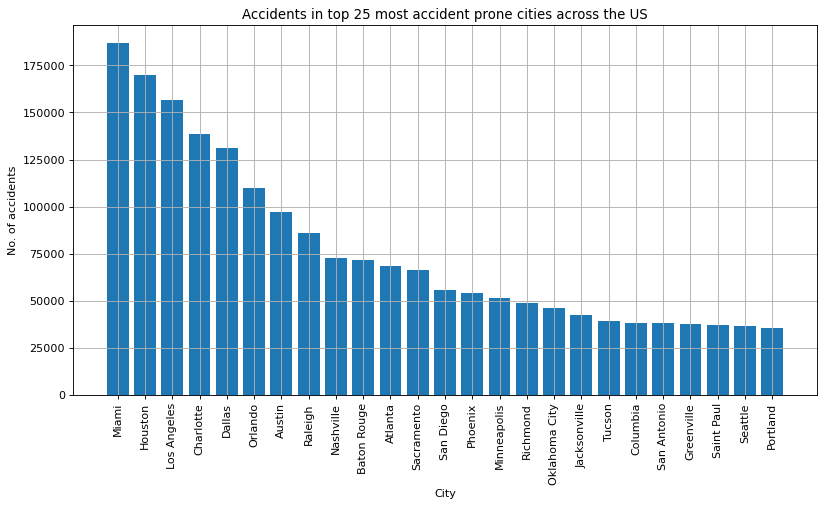

In [26]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
plt.grid(True)

plt.bar(top_25_cities['City'], top_25_cities['Cases'])
plt.xlabel('City')
plt.ylabel('No. of accidents')
plt.title('Accidents in top 25 most accident prone cities across the US')
plt.xticks(rotation=90)
plt.show()

<h3>TO DO- GEOSPATIAL, REMOVE ONCE DONE for City Analysis</h3>

# State Analysis

In [27]:
state_df = pd.DataFrame(data['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})

In [28]:
state_df.head(25)

,State,Cases
0,CA,1741433
1,FL,880192
2,TX,582837
3,SC,382557
4,NY,347960
5,NC,338199
6,VA,303301
7,PA,296620
8,MN,192084
9,OR,179660


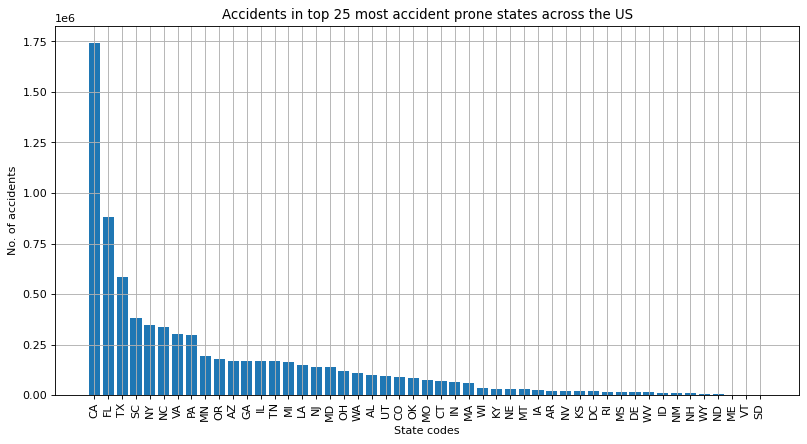

In [29]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
plt.grid(True)

plt.bar(state_df['State'], state_df['Cases'])
plt.xlabel('State codes')
plt.ylabel('No. of accidents')
plt.title('Accidents in top 25 most accident prone states across the US')
plt.xticks(rotation=90)
plt.show()

<h3>TO DO- GEOSPATIAL, REMOVE ONCE DONE for State Analysis</h3>

# Hour Analysis

In [30]:
data['Start_Hour'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20,  4, 13,
       23, 21, 22,  0,  1,  2,  3])

In [31]:
hour_df = pd.DataFrame(data['Start_Hour'].value_counts()).reset_index().rename(columns={'index':'Start_Hour', 'Start_Hour':'Cases'})

In [32]:
hour_df

,Start_Hour,Cases
0,7,587472
1,16,581969
2,8,577576
3,17,576015
4,15,525855
5,14,448846
6,18,432042
7,6,405837
8,13,396445
9,9,363034


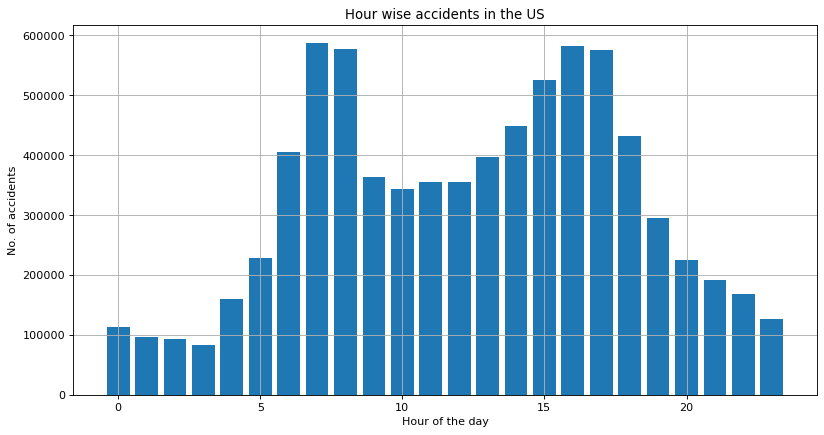

In [33]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
plt.grid(True)
plt.bar(hour_df['Start_Hour'], hour_df['Cases'])
plt.xlabel('Hour of the day')
plt.ylabel('No. of accidents')
plt.title('Hour wise accidents in the US')
plt.show()

 <h3>TO DO- GEOSPATIAL, REMOVE ONCE DONE for Hour Analysis</h3>

# Street Analysis

In [35]:
street_df = pd.DataFrame(data['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

In [37]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))
top_ten_streets_df

,Street No.,Cases
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725
5,I-5 S,51781
6,I-80 W,39662
7,I-80 E,36113
8,I-405 N,32364
9,I-75 N,28166


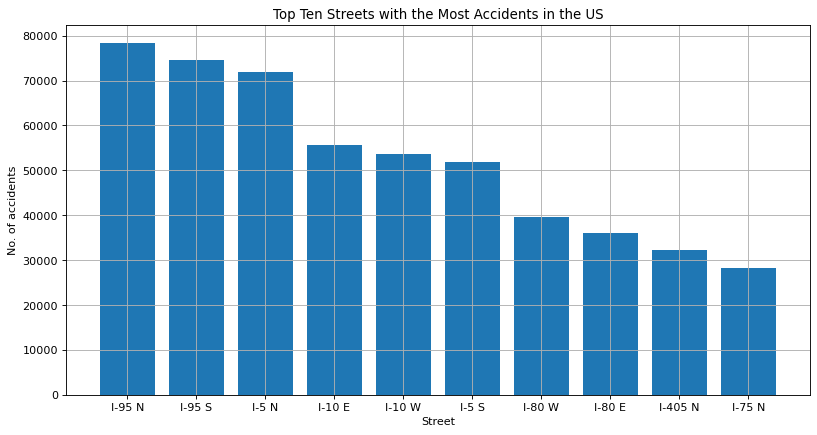

In [40]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
plt.grid(True)
plt.bar(top_ten_streets_df['Street No.'], top_ten_streets_df['Cases'])
plt.xlabel('Street')
plt.ylabel('No. of accidents')
plt.title('Top Ten Streets with the Most Accidents in the US')
plt.show()

 <h3>TO DO- GEOSPATIAL, REMOVE ONCE DONE for Street Analysis</h3>

# Severity Analysis

<h3>The severity rating ranges from 1 to 4, with 1 indicating minor impact (short delay) and 4 indicating major impact (long delay) on traffic. Caution: Severity ratings may vary between sources, so segregate data from different sources for accurate analysis.</h3>

In [69]:
# create a dataframe of Severity and the corresponding accident cases
severity_df = pd.DataFrame(data['Severity'].value_counts()).rename(columns={'index':'Severity', 'Severity':'Cases'})

In [70]:
fig = go.Figure(go.Funnelarea(
    text=["Severity - 2", "Severity - 3", "Severity - 4", "Severity - 1"],
    values=severity_df.Cases,
    title={"position": "top center", 
           "text": "<b>Impact on Traffic due to Accidents</b>", 
           'font': {'size': 18, 'color': "#7f7f7f"}},
    marker={"colors": ['#14a3ee', '#b4e6ee', '#fdf4b8', '#ff4f4e'],
            "line": {"color": ["#e8e8e8", "wheat", "wheat", "wheat"], "width": [7, 0, 0, 2]}}
))

# Adjusting the plot size
fig.update_layout(width=800, height=600)
fig.show()

 <h3>TO DO- GEOSPATIAL, REMOVE ONCE DONE for Severity Analysis</h3>

# Weather Analysis

In [123]:
def generate_intervals_labels(attribute, split, gap):
    var_min = min(data[attribute])
    intervals = [var_min + i * gap for i in range(split + 1)]
    labels = []

    for i in range(1, len(intervals)):
        lower_limit = intervals[i-1]
        upper_limit = intervals[i]
        
        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)

    return intervals, labels

In [136]:
def Feature_Bin_Plot(dataframe, attribute, color, intervals, labels, title):
    new_df = dataframe.copy()
    xlabel = 'Different {} Grouped Value'.format(attribute)
    new_df[xlabel] = pd.cut(x=new_df[attribute], bins=intervals, labels=labels, include_lowest=True)
    temp_df = pd.DataFrame(new_df[xlabel].value_counts()).reset_index().rename(
        columns={'index': 'Bins', xlabel: 'Cases'}).sort_values('Bins')

    count, max_index = 0, 0
    cases_list = list(temp_df['Cases'])
    for i in cases_list:
        if i == max(temp_df['Cases']):
            max_index = count
            break
        count += 1

    total = len(new_df[xlabel])
    plt.figure(figsize=(12, 6))

    if isinstance(color, str):  # Check if color is a string
        clrs = [color] * len(intervals)
    else:
        cmap = cm.get_cmap(color, len(intervals))
        clrs = [mcolors.rgb2hex(cmap(i)) for i in range(cmap.N)]

    ax = sns.barplot(y=temp_df['Cases'], x=temp_df['Bins'], palette=clrs)

    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2, i.get_height(),
                '{:,d}\nCases\n({}%) '.format(int(i.get_height()), round(100 * i.get_height() / total, 2)),
                fontsize=14, ha='center', color='black')

    plt.title(title, size=20, color='grey')

    ax.set_xlabel('\n{}\n'.format(xlabel), fontsize=15, color='grey')
    ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

    ax.set_axisbelow(True)
    ax.grid(axis='y', color='#b2d6c7', linewidth=1, alpha=.3)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels
    plt.tight_layout()  # Adjust layout for better spacing
    MA = mpatches.Patch(color=clrs[max_index],
                        label='{} Range with Maximum\n no. of Road Accidents'.format(attribute))
    ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, labelcolor=[clrs[max_index]],
              edgecolor='white')
    plt.show()

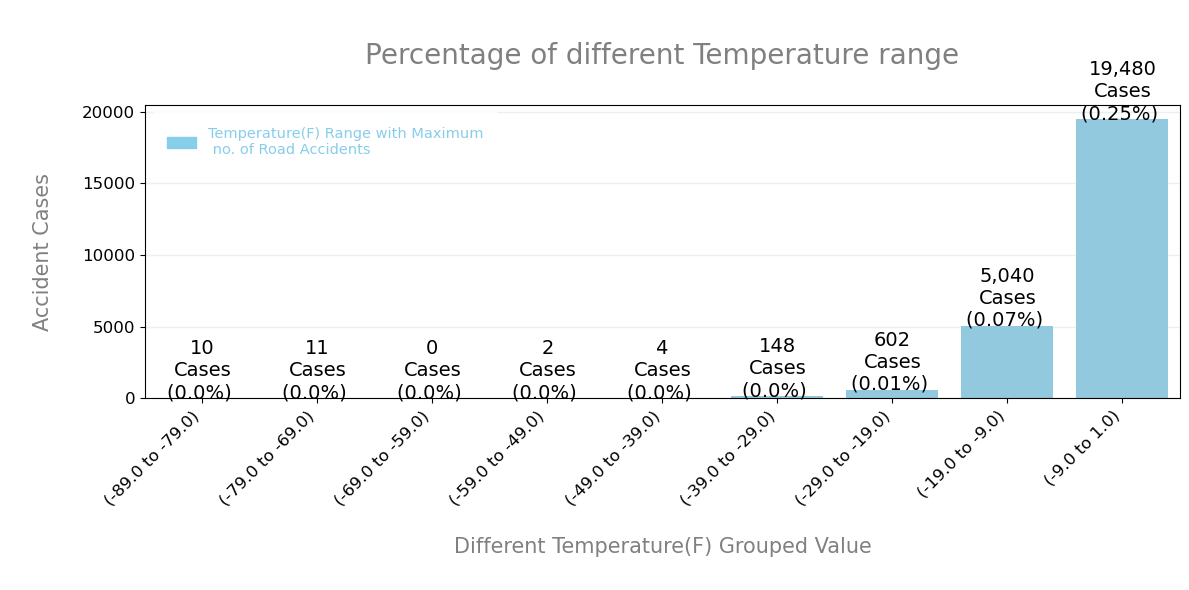

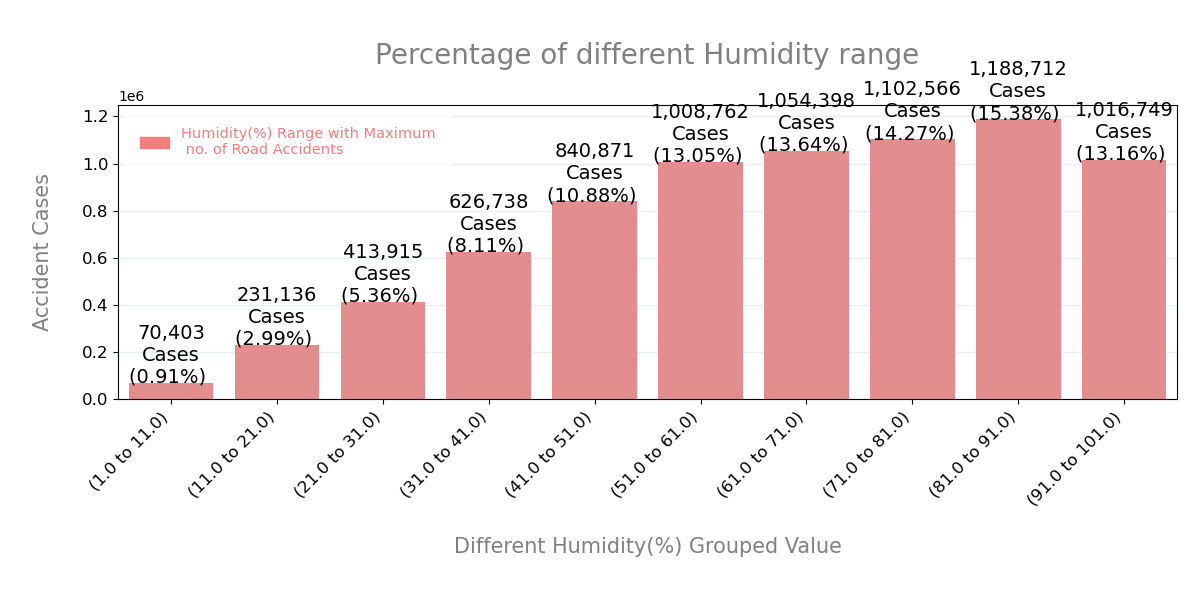

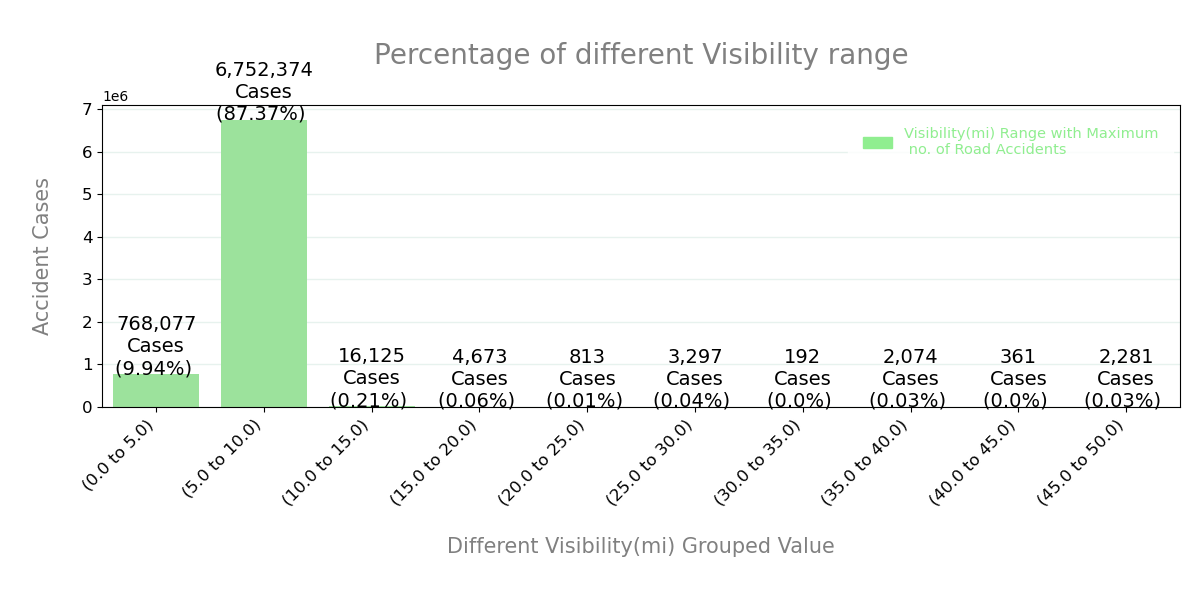

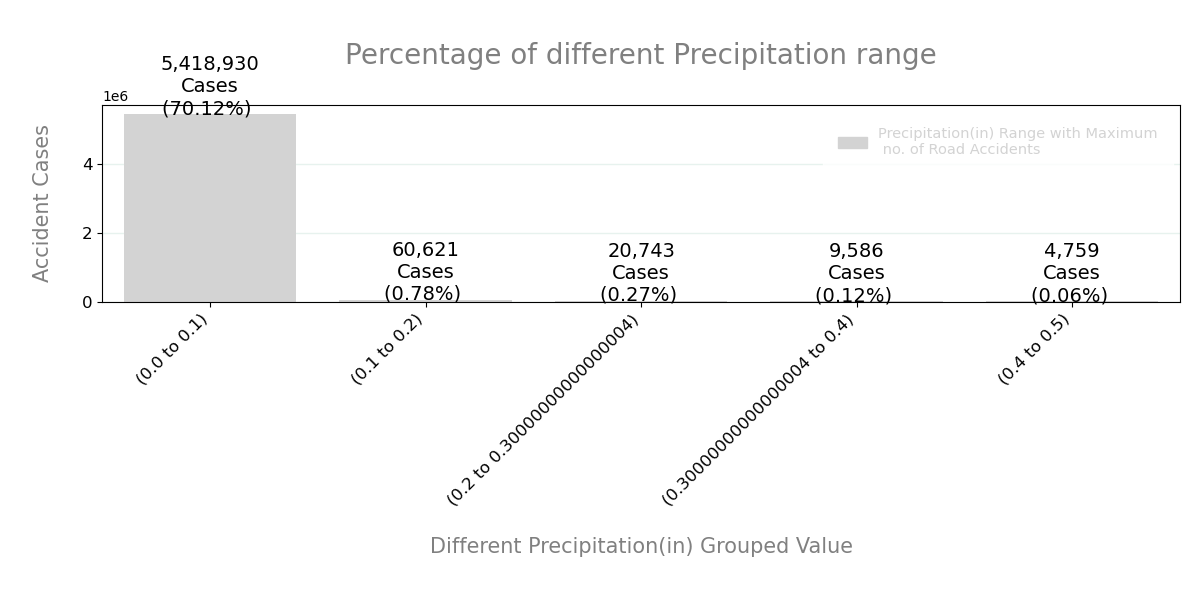

In [137]:
# Weather Analysis
# Temperature Analysis
temp_intervals, temp_labels = generate_intervals_labels('Temperature(F)', 9, 10)
Feature_Bin_Plot(data, 'Temperature(F)', 'skyblue', temp_intervals, temp_labels, '\nPercentage of different Temperature range\n')

# Humidity Analysis
humidity_intervals, humidity_labels = generate_intervals_labels('Humidity(%)', 10, 10)
Feature_Bin_Plot(data, 'Humidity(%)', 'lightcoral', humidity_intervals, humidity_labels, '\nPercentage of different Humidity range\n')

# Visibility Analysis
visibility_intervals, visibility_labels = generate_intervals_labels('Visibility(mi)', 10, 5)
Feature_Bin_Plot(data, 'Visibility(mi)', 'lightgreen', visibility_intervals, visibility_labels, '\nPercentage of different Visibility range\n')

# Precipitation Analysis
precipitation_intervals, precipitation_labels = generate_intervals_labels('Precipitation(in)', 5, 0.1)
Feature_Bin_Plot(data, 'Precipitation(in)', 'lightgrey', precipitation_intervals, precipitation_labels, '\nPercentage of different Precipitation range\n')


# Gauravjit Singh 

In [2]:
personal_data_location = r"D:\(A) Gauravjit\NYU MASTERS COURSE\OneDrive - nyu.edu\SEM 3\Introduction to Applied Data Science\Project Data\US_Accidents_March23.csv"


# Sanyogita

In [15]:
import os
filename = "US_Accidents_March23.csv"
current_directory = "/Users/sanyogitadeshmukh/Downloads"
personal_data_location = os.path.join(current_directory, filename)

# Koyel

In [ ]:
personal_data_location = r"your_local_data_path"


# Akanksha

In [ ]:
personal_data_location = r"your_local_data_path"
